In [2]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
os.listdir('dataset/mnist_png')

['training', 'testing']

## MNIST png

In [14]:
label_nums = os.listdir('dataset/mnist_png/training/')
label_nums = sorted(label_nums)
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [15]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [16]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

Text(0.5, 1.0, 'Number of Dataset per class')

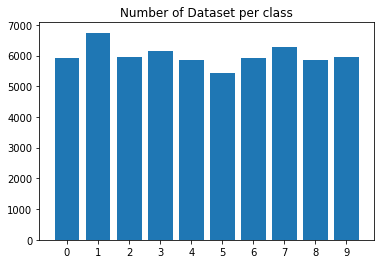

In [17]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per class')

## Pillow

In [22]:
files_0 = glob('dataset/mnist_png/training/0/*.png')
path = files_0[0]

In [23]:
path

'dataset/mnist_png/training/0/50081.png'

In [25]:
image_pil = Image.open(path)
image = np.array(image_pil)
image.shape

(28, 28)

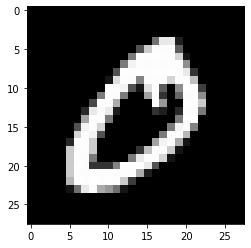

In [26]:
plt.imshow(image, 'gray')

## TensorFlow

In [27]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)
image.shape

2021-08-10 16:03:23.095334: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-08-10 16:03:23.148697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-10 16:03:23.149127: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-08-10 16:03:23.149170: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-10 16:03:23.149561: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 1 with properties: 
pciBusID: 0000:

TensorShape([28, 28, 1])

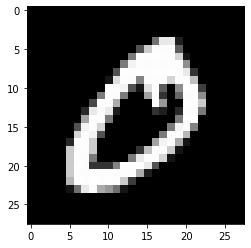

In [28]:
plt.imshow(image[:, :, 0], 'gray')

## Label

In [29]:
path

'dataset/mnist_png/training/0/50081.png'

In [30]:
path.split('/')

['dataset', 'mnist_png', 'training', '0', '50081.png']

In [31]:
path.split('/')[-2]

'0'

In [32]:
def get_label(path):
    class_name = path.split('/')[-2]
    label = int(class_name)
    return label

In [33]:
get_label(path)

0

## Get Size of Data Image

In [37]:
from tqdm import tqdm_notebook

heights = []
widths = []

data_paths = glob('dataset/mnist_png/training/*/*.png')
len(data_paths)

60000

In [38]:
data_paths

['dataset/mnist_png/training/2/24786.png',
 'dataset/mnist_png/training/2/1852.png',
 'dataset/mnist_png/training/2/25156.png',
 'dataset/mnist_png/training/2/22579.png',
 'dataset/mnist_png/training/2/23323.png',
 'dataset/mnist_png/training/2/43351.png',
 'dataset/mnist_png/training/2/7633.png',
 'dataset/mnist_png/training/2/46867.png',
 'dataset/mnist_png/training/2/9518.png',
 'dataset/mnist_png/training/2/51542.png',
 'dataset/mnist_png/training/2/18489.png',
 'dataset/mnist_png/training/2/51961.png',
 'dataset/mnist_png/training/2/27026.png',
 'dataset/mnist_png/training/2/9333.png',
 'dataset/mnist_png/training/2/46319.png',
 'dataset/mnist_png/training/2/13406.png',
 'dataset/mnist_png/training/2/15680.png',
 'dataset/mnist_png/training/2/45459.png',
 'dataset/mnist_png/training/2/15228.png',
 'dataset/mnist_png/training/2/1573.png',
 'dataset/mnist_png/training/2/10207.png',
 'dataset/mnist_png/training/2/11380.png',
 'dataset/mnist_png/training/2/46833.png',
 'dataset/mnist_

In [40]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

/tmp/ipykernel_21992/307869694.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for path in tqdm_notebook(data_paths):


  0%|          | 0/60000 [00:00<?, ?it/s]

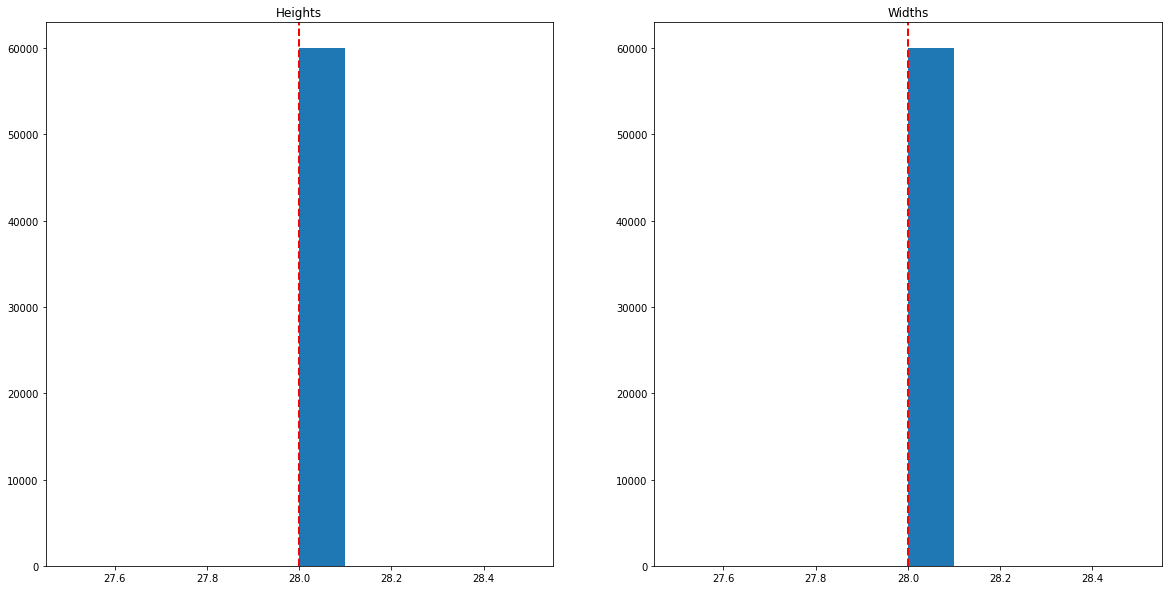

In [44]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)


## Data Generator

In [57]:
data_paths = glob('dataset/mnist_png/training/0/*.png')

In [61]:
path = data_paths[0]
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [62]:
image.shape

TensorShape([28, 28, 1])

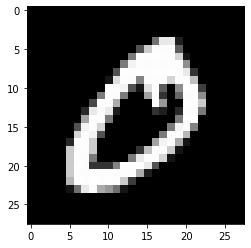

In [64]:
plt.imshow(image[:, :, 0], 'gray')

In [63]:
inputs = image[tf.newaxis, ...]
inputs.shape

TensorShape([1, 28, 28, 1])

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [47]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True
    )

In [68]:
output = next(iter(datagen.flow(inputs)))

In [69]:
output.shape

(1, 28, 28, 1)

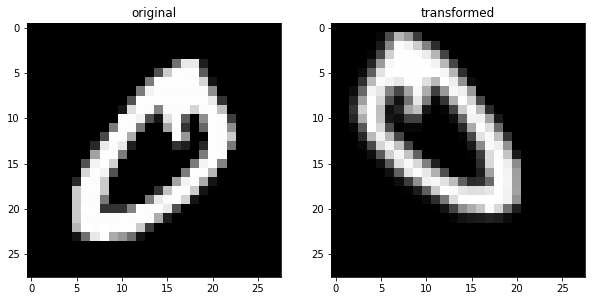

In [75]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('original')
plt.imshow(np.squeeze(image), 'gray')

plt.subplot(122)
plt.title('transformed')
plt.imshow(np.squeeze(output), 'gray')

## using flow_from_directory

In [80]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
import tensorflow.keras.layers as layers
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
train_dir = 'dataset/mnist_png/training'
test_dir = 'dataset/mnist_png/testing'

In [77]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [86]:
input_shape = (28, 28, 1)
batch_size = 32

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=input_shape[:2],
                                                   batch_size=batch_size,
                                                   color_mode='grayscale',
                                                   class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=input_shape[:2],
                                                   batch_size=batch_size,
                                                   color_mode='grayscale',
                                                   class_mode='categorical')

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [81]:
inputs = layers.Input((28, 28, 1))

net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(inputs)
net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Flatten()(net)
net = layers.Dense(512, activation='relu')(net)
net = layers.Dropout(0.2)(net)
net = layers.Dense(10, activation='softmax')(net)

model = tf.keras.Model(inputs=inputs,
                      outputs=net,
                      name='Basic_CNN')

model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36

In [89]:
loss = 'categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

In [90]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

In [92]:
num_classes = 10
epochs = 3

hist = model.fit_generator(train_generator,
                          steps_per_epoch=len(train_generator),
                          epochs=epochs,
                          validation_data=validation_generator,
                          validation_steps=len(validation_generator))

Epoch 1/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0198 - val_accuracy: 0.9942
Epoch 2/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0234 - val_accuracy: 0.9932
Epoch 3/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0279 - val_accuracy: 0.9933


## using flow_from_dataframe

In [98]:
train_paths = glob('dataset/cifar/train/*.png')
test_paths = glob('dataset/cifar/test/*.png')

In [99]:
len(train_paths), len(test_paths)

(50000, 10000)

In [100]:
path = train_paths[0]
path

'dataset/cifar/train/39769_automobile.png'

In [103]:
filename = os.path.basename(path)
filename

'39769_automobile.png'

In [107]:
def get_class_name(path):
    fname = os.path.basename(path)
    cls_name = fname.replace('.png','').split('_')[-1]
    return cls_name

In [109]:
cls_name = get_class_name(path)
path, cls_name

('dataset/cifar/train/39769_automobile.png', 'automobile')

In [111]:
class_names = []

for path in train_paths:
    cls_name = get_class_name(path)
    class_names.append(cls_name)

In [121]:
test_names = [get_class_name(path) for path in test_paths]

In [113]:
np.unique(class_names)

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [114]:
np.unique(class_names, return_counts=True)

(array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
        'horse', 'ship', 'truck'], dtype='<U10'),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

## DataFrame create

In [115]:
import pandas as pd

In [117]:
data = {'name': train_paths, 'class': class_names}

In [125]:
train_df = pd.DataFrame(data)

In [126]:
train_df.head()

,name,class
0,dataset/cifar/train/39769_automobile.png,automobile
1,dataset/cifar/train/44545_airplane.png,airplane
2,dataset/cifar/train/2936_bird.png,bird
3,dataset/cifar/train/7063_cat.png,cat
4,dataset/cifar/train/38360_cat.png,cat


In [122]:
test_data = {'name': test_paths, 'class': test_names}
test_df = pd.DataFrame(test_data)
test_df.head()

,name,class
0,dataset/cifar/test/2799_ship.png,ship
1,dataset/cifar/test/2435_frog.png,frog
2,dataset/cifar/test/1910_deer.png,deer
3,dataset/cifar/test/6584_dog.png,dog
4,dataset/cifar/test/3984_frog.png,frog


## DataFrame save

In [123]:
train_csv_path = 'train_dataset.csv'
test_csv_path = 'test_dataset.csv'

In [127]:
train_df.to_csv(train_csv_path, index=False)

In [128]:
test_df.to_csv(test_csv_path, index=False)

## using flow_from_dataframe

In [130]:
train_df = pd.read_csv('train_dataset.csv')
test_df = pd.read_csv('test_dataset.csv')

In [131]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)

In [133]:
input_shape = (28, 28, 1)
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                    x_col='name',
                                                    y_col='class',
                                                   target_size=input_shape[:2],
                                                   batch_size=batch_size,
                                                   color_mode='grayscale',
                                                   class_mode='categorical')

validation_generator = test_datagen.flow_from_dataframe(test_df,
                                                    x_col='name',
                                                    y_col='class',
                                                   target_size=input_shape[:2],
                                                   batch_size=batch_size,
                                                   color_mode='grayscale',
                                                   class_mode='categorical')

Found 50000 validated image filenames belonging to 10 classes.
Found 10000 validated image filenames belonging to 10 classes.


In [134]:
inputs = layers.Input((28, 28, 1))

net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(inputs)
net = layers.Conv2D(32, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(net)
net = layers.MaxPooling2D((2,2))(net)
net = layers.Dropout(0.2)(net)

net = layers.Flatten()(net)
net = layers.Dense(512, activation='relu')(net)
net = layers.Dropout(0.2)(net)
net = layers.Dense(10, activation='softmax')(net)

model = tf.keras.Model(inputs=inputs,
                      outputs=net,
                      name='Basic_CNN')

In [135]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=metrics)

In [136]:
num_classes = 10
epochs = 3

hist = model.fit_generator(train_generator,
                          steps_per_epoch=len(train_generator),
                          epochs=epochs,
                          validation_data=validation_generator,
                          validation_steps=len(validation_generator))

Epoch 1/3
1563/1563 [==============================] - 20s 13ms/step - loss: 1.6474 - accuracy: 0.4084 - val_loss: 1.4290 - val_accuracy: 0.4948
Epoch 2/3
1563/1563 [==============================] - 19s 12ms/step - loss: 1.2580 - accuracy: 0.5569 - val_loss: 1.0677 - val_accuracy: 0.6266
Epoch 3/3
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0906 - accuracy: 0.6203 - val_loss: 1.0314 - val_accuracy: 0.6400
